In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import statsmodels.api as sm
%matplotlib inline

# The Affects of COVID-19 on Global Happiness
#### Research Question: How do the higher-ranked and lower-ranked countries in GDP compare in level of happiness before and during COVID-19?

### Loading Data

In [45]:
happiness_df_2021 = (pd.read_csv('/users/annabelle/School/2021/Summer2/data301/group25-project/project-group25-project/data/raw/world-happiness-report-2021.csv')
       .rename(columns = {'Ladder score':"Happiness score",'Logged GDP per capita':'Log GDP per capita'})
       .assign(year='2021')
       .drop(['upperwhisker',
                        'lowerwhisker',
                        'Standard error of ladder score',
                        'Explained by: Log GDP per capita',
                        'Explained by: Social support',
                        'Explained by: Healthy life expectancy',
                        'Ladder score in Dystopia',
                        'Explained by: Generosity',
                        'Explained by: Freedom to make life choices',
                        'Explained by: Perceptions of corruption',
                        'Dystopia + residual',
                        'Regional indicator'],axis='columns')
           )
        
happiness_df_2021.head()

,Country name,Happiness score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,Finland,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,2021
1,Denmark,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2021
2,Switzerland,7.571,11.117,0.942,74.4,0.919,0.025,0.292,2021
3,Iceland,7.554,10.878,0.983,73.0,0.955,0.160,0.673,2021
4,Netherlands,7.464,10.932,0.942,72.4,0.913,0.175,0.338,2021


In [46]:
df2 = (pd.read_csv('/users/annabelle/School/2021/Summer2/data301/group25-project/project-group25-project/data/raw/world-happiness-report.csv')
       .rename(columns = {'Life Ladder':"Happiness score",'Healthy life expectancy at birth':"Healthy life expectancy"})
       .drop(['Positive affect','Negative affect'],axis='columns')
       .loc[lambda x: x['year']>2018]
      )
df2

,Country name,year,Happiness score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
11,Afghanistan,2019,2.375,7.697,0.420,52.4,0.394,-0.108,0.924
23,Albania,2019,4.995,9.544,0.686,69.0,0.777,-0.099,0.914
24,Albania,2020,5.365,9.497,0.710,69.3,0.754,0.007,0.891
32,Algeria,2019,4.745,9.337,0.803,66.1,0.385,0.005,0.741
50,Argentina,2019,6.086,10.000,0.896,69.0,0.817,-0.211,0.830
...,...,...,...,...,...,...,...,...,...
1919,Yemen,2019,4.197,NaN,0.870,57.5,0.651,NaN,0.798
1932,Zambia,2019,3.307,8.155,0.638,55.8,0.811,0.077,0.832
1933,Zambia,2020,4.838,8.117,0.767,56.3,0.750,0.056,0.810
1947,Zimbabwe,2019,2.694,7.950,0.759,56.2,0.632,-0.064,0.831


In [47]:
df2.dropna(subset=['Log GDP per capita'], inplace=True)

In [48]:
df2.fillna(method ='pad')

,Country name,year,Happiness score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
11,Afghanistan,2019,2.375,7.697,0.420,52.4,0.394,-0.108,0.924
23,Albania,2019,4.995,9.544,0.686,69.0,0.777,-0.099,0.914
24,Albania,2020,5.365,9.497,0.710,69.3,0.754,0.007,0.891
32,Algeria,2019,4.745,9.337,0.803,66.1,0.385,0.005,0.741
50,Argentina,2019,6.086,10.000,0.896,69.0,0.817,-0.211,0.830
...,...,...,...,...,...,...,...,...,...
1907,Vietnam,2019,5.467,8.992,0.848,68.1,0.952,-0.126,0.788
1932,Zambia,2019,3.307,8.155,0.638,55.8,0.811,0.077,0.832
1933,Zambia,2020,4.838,8.117,0.767,56.3,0.750,0.056,0.810
1947,Zimbabwe,2019,2.694,7.950,0.759,56.2,0.632,-0.064,0.831


In [49]:
df2 = df2.reset_index(drop=True)

### Seperating df2 by Year (2019 & 2020)

In [50]:
def load_year (dataframe ,year):
    dfyear = dataframe[dataframe['year'] == year].reset_index(drop=True)
    return dfyear

In [51]:
happiness_df_2019 = load_year(df2,2019)

In [52]:
happiness_df_2020 = load_year(df2,2020)

### Seperated happiness_df_2019 by Top and Bottom GDP

In [88]:
GDP_2019=happiness_df_2019.sort_values(by = ['Log GDP per capita'], ascending = False)
GDP_2019=GDP_2019.reset_index()
GDP_2019.drop(columns = ['index'], inplace=True)

In [89]:
Top10_GDP_2019 = GDP_2019.head(10)

In [90]:
Lowest10_GDP_2019 = GDP_2019.tail(10)

### Bar Graph of Top 10 Logged GDP per Capita by Country in 2019

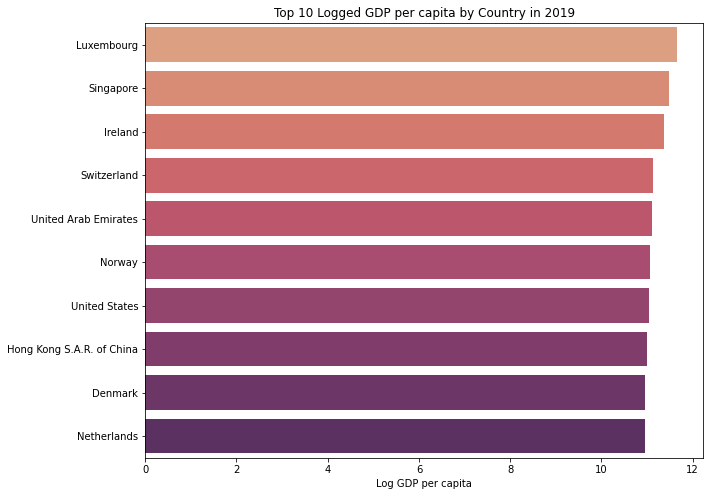

In [129]:
plt.figure(figsize=(10,8))
ax = sns.barplot(y="Country name", x="Log GDP per capita", data=Top10_GDP_2019, palette=sns.color_palette("flare",10))
plt.title('Top 10 Logged GDP per capita by Country in 2019')
ax.set(xlabel='Log GDP per capita', ylabel='')
plt.show()

### Bar Graph of Bottom 10 Logged GDP per Capita by Country in 2019

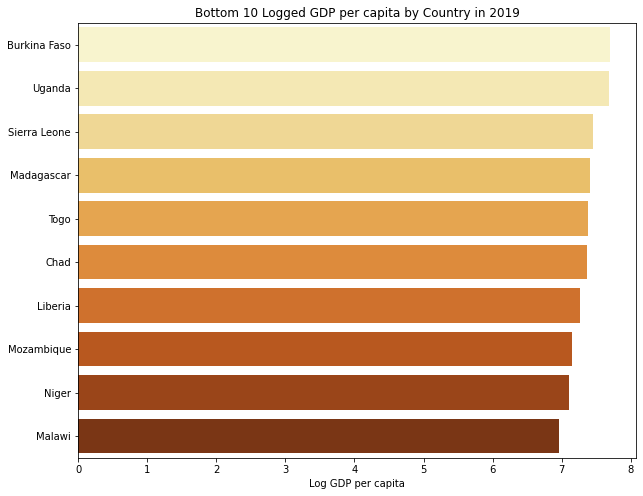

In [128]:
plt.figure(figsize=(10,8))
ax = sns.barplot(y="Country name", x="Log GDP per capita", data=Lowest10_GDP_2019, palette=sns.color_palette("YlOrBr",10))
plt.title('Bottom 10 Logged GDP per capita by Country in 2019')
ax.set(xlabel='Log GDP per capita', ylabel='')
plt.show()

### Seperated happiness_df_2020 by Top and Bottom GDP

In [100]:
GDP_2020=happiness_df_2020.sort_values(by = ['Log GDP per capita'], ascending = False)
GDP_2020=GDP_2020.reset_index()
GDP_2020.drop(columns = ['index'], inplace=True)

In [101]:
Top10_GDP_2020 = GDP_2020.head(10)

In [103]:
Lowest10_GDP_2020 = GDP_2020.tail(10)

### Bar Graph of Top 10 Logged GDP per Capita by Country in 2020

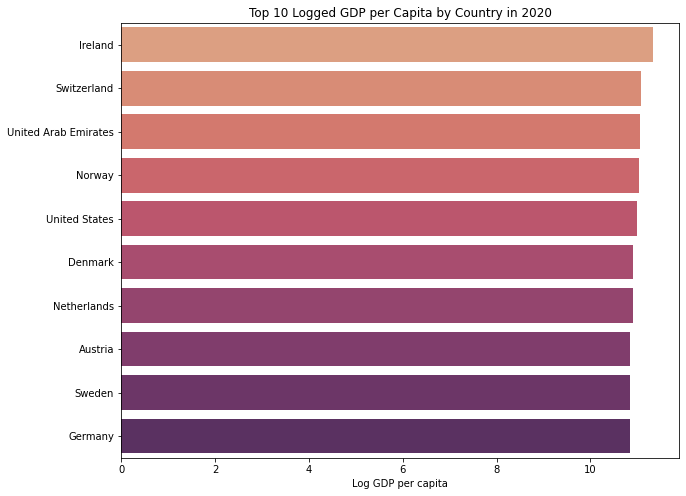

In [109]:
plt.figure(figsize=(10,8))
ax = sns.barplot(y="Country name", x="Log GDP per capita", data=Top10_GDP_2020, palette=sns.color_palette("flare",10))
plt.title('Top 10 Logged GDP per Capita by Country in 2020')
ax.set(xlabel='Log GDP per capita', ylabel='')
plt.show()

The information on this graph changed by a lot from last years graph. There are certain countries that are not present in the top 10 for 2020, that were present in 2019. The top 2 in 2019 were Luxembourg and Singapore, but they are not located in the top 10 for 2002. There are two explanations for this: Their logged GDP per capita diminished by a lot or there's no data for those countries in 2020. There are also three new countries in the Top 10: Austria, Sweden and Germany.

### Bar Graph of Bottom 10 Logged GDP per Capita by Country in 2020

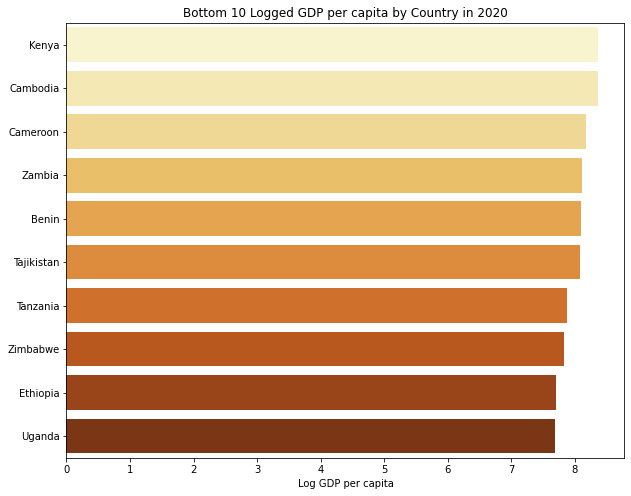

In [127]:
plt.figure(figsize=(10,8))
ax = sns.barplot(y="Country name", x="Log GDP per capita", data=Lowest10_GDP_2020, palette=sns.color_palette("YlOrBr",10))
plt.title('Bottom 10 Logged GDP per capita by Country in 2020')
ax.set(xlabel='Log GDP per capita', ylabel='')
plt.show()

The Bottom 10 in 2020 is completely different from the bottom 10 from 2019. The only country that is in both graph is Uganda, which 9th to last in 2019.

### Seperated happiness_df_2021 by Top and Bottom GDP

In [93]:
GDP_2021=happiness_df_2021.sort_values(by = ['Log GDP per capita'], ascending = False)
GDP_2021=GDP_2021.reset_index()
GDP_2021.drop(columns = ['index'], inplace=True)

In [94]:
Top10_GDP_2021 = GDP_2021.head(10)

In [95]:
GDP_2021.drop(GDP_2021.index[-1], inplace=True)
Lowest10_GDP_2021 = GDP_2021.tail(10)

### Top 10 Logged GDP per capita by Country in 2021

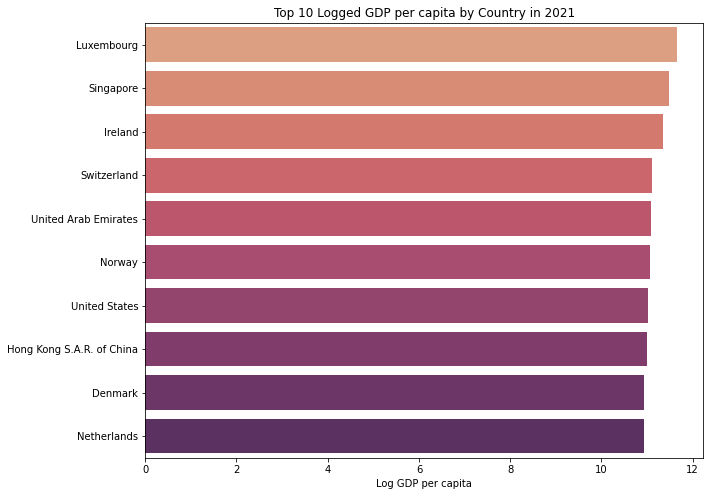

In [126]:
plt.figure(figsize=(10,8))
ax = sns.barplot(y="Country name", x="Log GDP per capita", data=Top10_GDP_2021, palette=sns.color_palette("flare",10))
plt.title('Top 10 Logged GDP per capita by Country in 2021')
ax.set(xlabel='Log GDP per capita', ylabel='')
plt.show()

The 2021 Top 10 Logged GDP per Capita graph is identical to the Top 10 in 2019. The numbers are not the same, but the listing of the countries are the exact same. 

### Bottom 10 Logged GDP per capita by Country in 2021

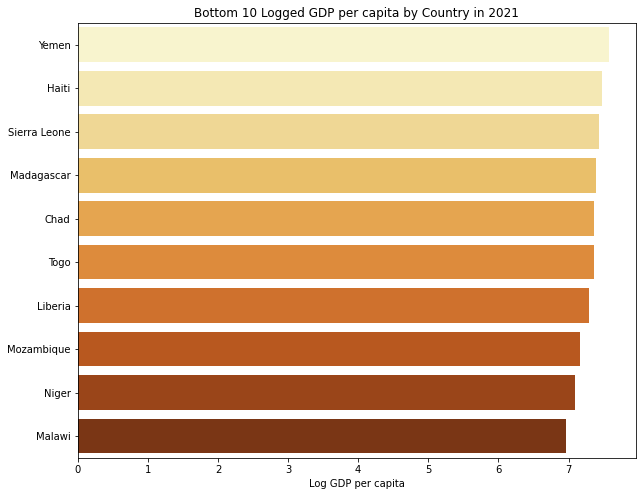

In [125]:
plt.figure(figsize=(10,8))
ax = sns.barplot(y="Country name", x="Log GDP per capita", data=Lowest10_GDP_2021, palette=sns.color_palette("YlOrBr",10))
plt.title('Bottom 10 Logged GDP per capita by Country in 2021')
ax.set(xlabel='Log GDP per capita', ylabel='')
plt.show()

The Bottom 10 for 2021 is also very similar to the results from the Bottom 10 for 2019. The only difference is that Haiti is in 2021 and Burkina Faso is in 2019.

### Combined All Tops and Bottoms by Year

In [83]:
Low_GDP= [Lowest10_GDP_2021,Lowest10_GDP_2020,Lowest10_GDP_2019]
Combined_Lowest_GDP = pd.concat(Low_GDP)

In [84]:
Top_GDP= [Top10_GDP_2021,Top10_GDP_2020,Top10_GDP_2019]
Combined_Top_GDP = pd.concat(Top_GDP)

### Top 10 Logged GDP per Capita by Country (2019-2021)

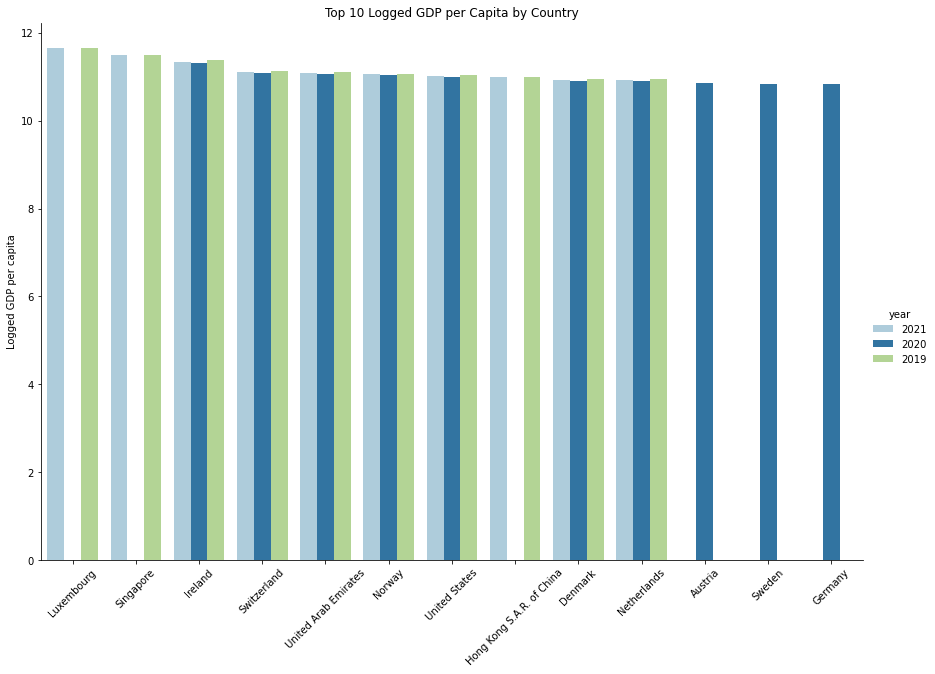

In [124]:
ax = sns.catplot(x='Country name', y='Log GDP per capita', hue='year', data=Combined_Top_GDP
            ,kind='bar',height = 8,aspect=1.5,palette=sns.color_palette("Paired"))
plt.xticks(rotation=45)
plt.title('Top 10 Logged GDP per Capita by Country')
ax.set(ylabel='Logged GDP per capita', xlabel='')
plt.show()

This bar graph combines all the data for the Top 10 Countries based on GDP per Capita from earlier. As suspected from earlier, this graph shows that Luxembourg and Singapore did not have data for 2020. There was also no data for Hong Kong S.A.R. of China. I suspect that if they did have data, all three of these countries would still be in the Top 10, seeing that they were also in the Top 10 for 2021. If this were the case, Austria, Sweden and Germany would not be in this graph.

In the graph, you also can see that data from 2019 is identical from 2021. For some reason, everyone's GDP per capita decreased by a little in 2020. I suspect might be due to the data collection or the pandemic.

### Happiness Scores of the Top 10 Countries

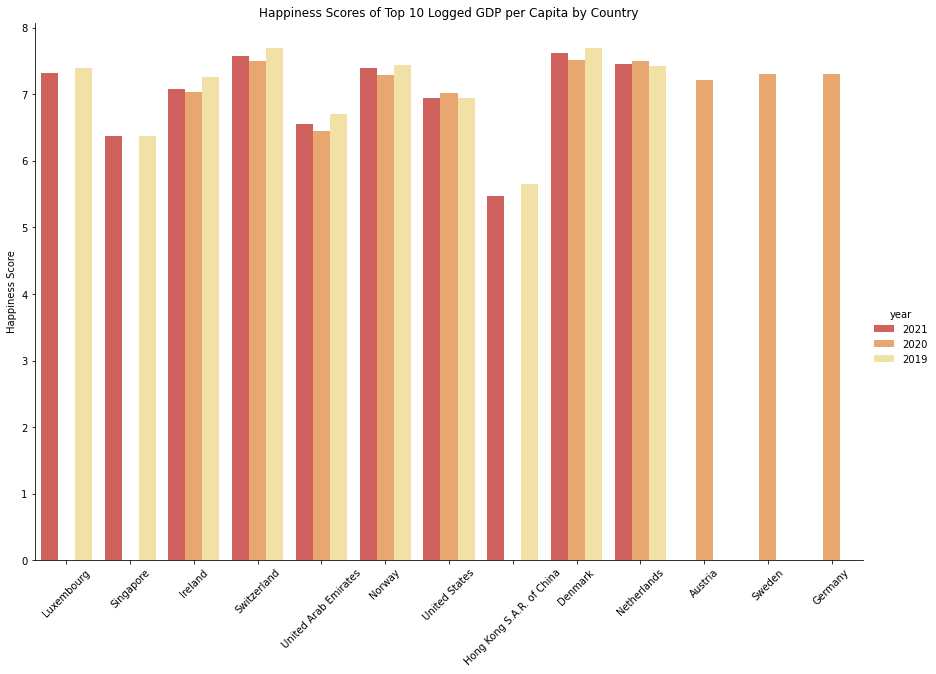

In [123]:
ax = sns.catplot(x='Country name', y='Happiness score', hue='year', data=Combined_Top_GDP
            ,kind='bar',height = 8,aspect=1.5,palette=sns.color_palette("Spectral"))
plt.xticks(rotation=45)
plt.title('Happiness Scores of Top 10 Logged GDP per Capita by Country')
ax.set(ylabel='Happiness Score', xlabel='')
plt.show()

This bar graph shows the happiness scores of the Top 10 Countries from the previous graphs.

- Luxembourg: There is a slight decrease in happiess score in 2021 compared to 2019.
- Singapore: The happiness score remained the same.
- Ireland: Dramatic decrease in 2020 compared to 2019, but increased in 2021. 2019 is still the highest score.
- Switzerland: Dramatic decrease in 2020 compared to 2019, but increased in 2021. 2019 is still the highest score.
- United Arab Emirates: Dramatic decrease in 2020 compared to 2019, but increased in 2021. 2019 is still the highest score.
- Norway: Dramatic decrease in 2020 compared to 2019, but increased in 2021. 2019 is still the highest score.
- United States: One of the few countries that increased their happiness score in 2020 compared to 2019. Scores in 2019 and 2021 are identical.
- Hong Kong S.A.R. of China: A decrease in happiness score in 2021, compared to 2019.
- Denmark: Dramatic decrease in 2020 compared to 2019, but increased in 2021. 2019 is still the highest score.
- Netherlands: Similar pattern to United States. They increased their happiness score in 2020. Scores in 2019 and 2021 are identical.
- Cannot analyze Austria, Sweden and Germany as theres no data to compare.

### Bottom 10 Logged GDP per Capita by Country

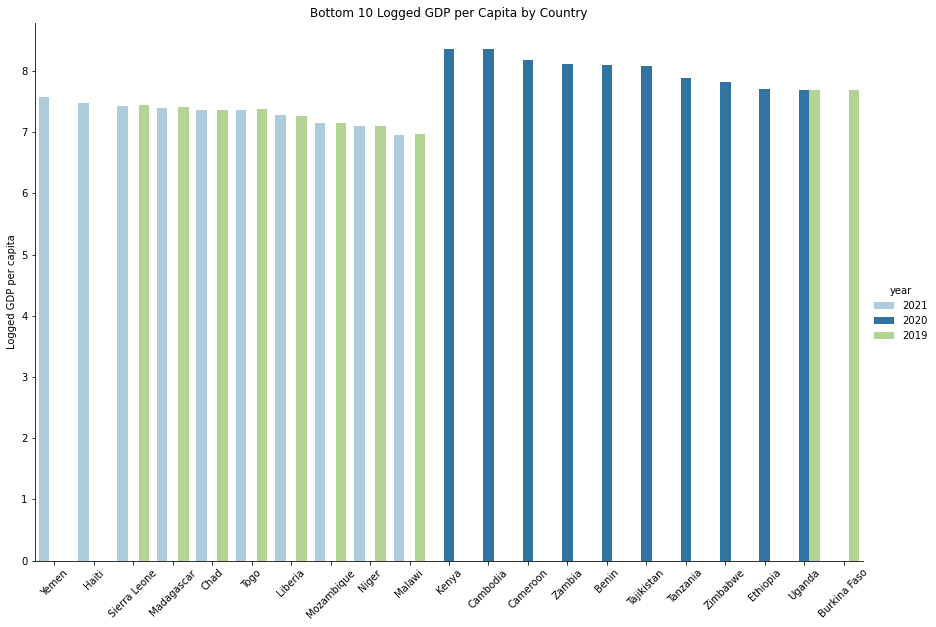

In [121]:
ax = sns.catplot(x='Country name', y='Log GDP per capita', hue='year', data=Combined_Lowest_GDP
            ,kind='bar',height = 8,aspect=1.5,palette=sns.color_palette("Paired"))
plt.xticks(rotation=45)
plt.title('Bottom 10 Logged GDP per Capita by Country')
ax.set(ylabel='Logged GDP per capita', xlabel='')
plt.show()

As seen in the bar graph, the Bottom 2020 list for GDP is completely different from 2019 and 2020. For the purpose of this analysis, I will ignore the following countries:
- Yemen
- Haiti
- Kenya
- Cambodia
- Cameroon
- Zambia
- Benin
- Tajikstan
- Tanzania
- Zimbabwe
- Ethiopia
- Burkina Faso

For the countries remainingg, their GDP per capita basically remained the same from 2019 to 2021.

### Happiness Scores of Bottom 10 Logged GDP per Capita by Country

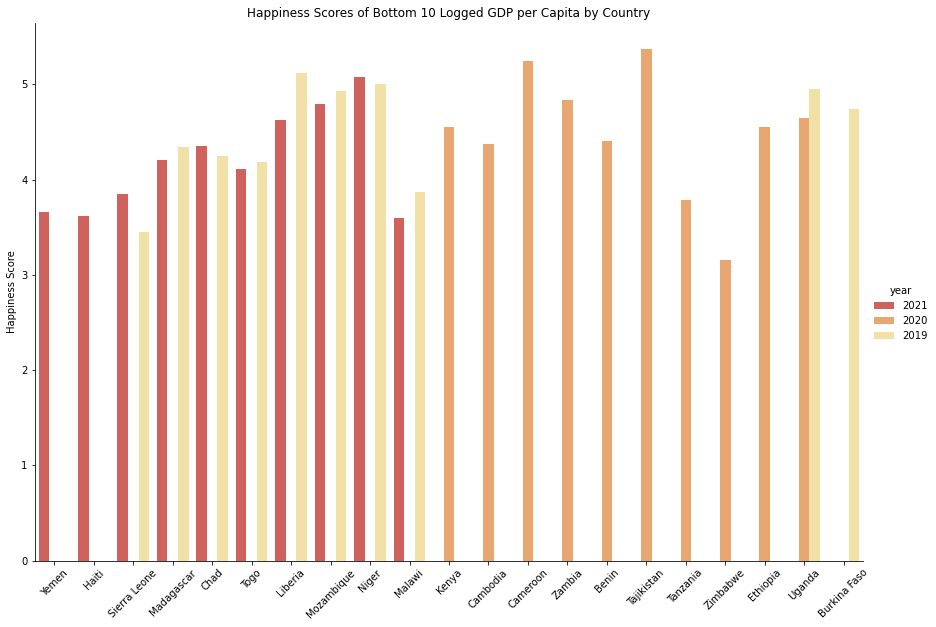

In [122]:
ax = sns.catplot(x='Country name', y='Happiness score', hue='year', data=Combined_Lowest_GDP
            ,kind='bar',height = 8,aspect=1.5,palette=sns.color_palette("Spectral"))
plt.xticks(rotation=45)
plt.title('Happiness Scores of Bottom 10 Logged GDP per Capita by Country')
ax.set(ylabel='Happiness Score', xlabel='')
plt.show()

This graph shows the happiness scores of the Bottom 10 Countries based on GDP per capita.
- Sierra Leone: Increase in happiness in 2021, compared to 2019
- Madagascar: Decrease in happiness in 2021, compared to 2019
- Chad: Increase in happiness in 2021, compared to 2019
- Togo: Decrease in happiness in 2021, compared to 2019
- Liberia: Decrease in happiness in 2021, compared to 2019
- Mozambique: Decrease in happiness in 2021, compared to 2019
- Niger:Increase in happiness in 2021, compared to 2019
- Malawi: Decrease in happiness in 2021, compared to 2019

### Conclusion

My analysis wanted to look into the higher-ranker and lower-ranked countries in GDP and compare countries' level of happiness before and during COVID-19. From the graphs and analyses, we can conclude that most countries decreased in happiness in 2021 compared to 2019, no matter if they are the Top or Bottom 10 Countries based on GDP per capita. In 2021, there were no happiness scores in the Top 10 Countries that surpassed the scores from 2019. 

However, Sierra Leone, Chad and Niger all increased their happiness scores, while keeping their GDP's constant. Out of all the 20 countries analyzed in this analysis, only 3 countries increased their happiness score. These countries are all from the Bottom 10 Countries and they managed to increase their happiness score during a global pandemic.